In [1]:
# why deep learning id becoming so popular?
# 1) Data growth
# 2) Hardware advancements
#3) Python and opensource ecosystem
#4) Cloud and AI Boom


In [4]:
#chunks of images and they tell that by the score of (0-0.5-1)
#if the score is greater than 0.5, then we will say yes to the result otherwise no.
# we can give more weightage to whatever part is prominient and decide whether it passes or not.
#


In [5]:
import tensorflow


In [6]:
#tensorflow vs pytorch vs keras
#tensorflow is from google, pytorch os from microsoft
#keras is not full deeplearning platform like tensorflow and pytorch, its a wrapper around tensorflow, cntk, theano.
#earlier when people were using cntk it was difficult to code in cntk so keras is created which made it easy.
#keras is inbuit in tensorflow which is used mostly. to use the convinent apis.



In [8]:
#Neural network for handwritten digits classification

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

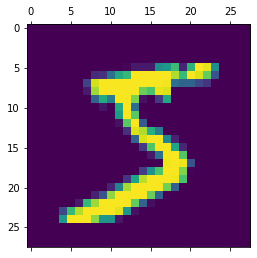

In [10]:
plt.matshow(x_train[0])

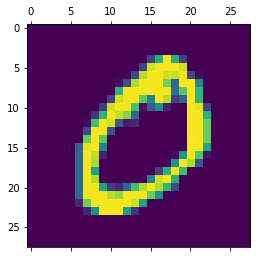

In [11]:
plt.matshow(x_train[1])

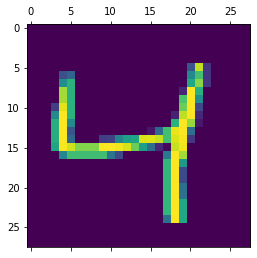

In [12]:
plt.matshow(x_train[2])

In [13]:
y_train[2]

4

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
x_train = x_train/255
x_test = x_test / 255

In [23]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
#flatten our dataset deom 2-d array to 1-d array
#for that we have reshape function.
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)


In [25]:
x_train_flatten.shape

(60000, 784)

In [26]:
x_test_flatten.shape

(10000, 784)

In [27]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = keras.Sequential([
    #sequence here means it is a stack of layers in the neural network.
    #Dense here means that every neuron in one layer is connected with every other neuron of another layer.
    keras.layers.Dense(10,input_shape= (784,),activation = 'sigmoid')
    #in dense (10 is output layer) and (784 is input layer.).
])

#that's it , this is simple neural network.
#in neural network we have to compile is everytime.
#what is optimizer? optimizers allows you to train efficiently. when the back propogation and training is going on.it allows you to reach to global optima.
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #out output data is categorical (0-9), sparse is our y_train is int., if it was one hot and coded array we would not have used sparse.
    metrics = ['accuracy']  #i want my metrics to be more accurate.
             )

model.fit(x_train_flatten, y_train, epochs = 5) #epochs means number of itreations out neural network will do the training.

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4839 - accuracy: 0.8802
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3062 - accuracy: 0.9159
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2856 - accuracy: 0.9211
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2743 - accuracy: 0.9244
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2678 - accuracy: 0.9263


In [29]:
#if the value comes low, that means we need to scale the values, they are not scaled.
#how do you scale the values? In this data set if we divide the matrix by 255

In [30]:
#evaluating test dataset.

model.evaluate(x_test_flatten,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.26787722011208537, 0.9235]

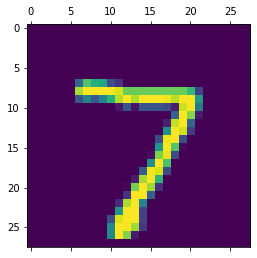

In [33]:
plt.matshow(x_test[0])

In [31]:
model.predict(x_test_flatten)
#this will predict all of the dataset

array([[1.7493963e-05, 0.0000000e+00, 3.5434961e-05, ..., 7.2103339e-01,
        7.7068806e-05, 1.1260808e-03],
       [3.7470460e-04, 1.4305115e-06, 5.7673359e-01, ..., 0.0000000e+00,
        7.6144934e-05, 0.0000000e+00],
       [1.6689301e-06, 4.4110692e-01, 7.4165165e-03, ..., 6.3046813e-04,
        3.2399893e-03, 2.1180511e-04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8312206e-06,
        1.8745661e-05, 5.0485134e-05],
       [0.0000000e+00, 2.9802322e-08, 5.9604645e-08, ..., 0.0000000e+00,
        3.7497282e-04, 0.0000000e+00],
       [1.1920929e-07, 0.0000000e+00, 1.1622906e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [34]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

#it is printing the 10 scores and we have to see the maximum in that to find the result.

array([1.7493963e-05, 0.0000000e+00, 3.5434961e-05, 6.9250166e-03,
       1.1622906e-06, 9.6291304e-05, 0.0000000e+00, 7.2103339e-01,
       7.7068806e-05, 1.1260808e-03], dtype=float32)

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted[1]

array([3.7470460e-04, 1.4305115e-06, 5.7673359e-01, 1.3861060e-04,
       0.0000000e+00, 3.8084388e-03, 4.4098794e-03, 0.0000000e+00,
       7.6144934e-05, 0.0000000e+00], dtype=float32)

In [37]:
np.argmax(y_predicted[1])

2

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] #we have to predict for every y_predicted values.
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [39]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
#to see how our model look like we will make confusion metrix. in tensorflow there is a method.

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: id=59243, shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    6,    3,    4,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  926,   12,    8,    6,   13,   10,   40,    3],
       [   4,    0,   21,  889,    1,   46,    2,   12,   27,    8],
       [   1,    1,    4,    1,  924,    0,    9,    4,    8,   30],
       [   8,    2,    2,   15,    8,  803,   13,    5,   28,    8],
       [   9,    3,    5,    1,    9,   23,  904,    2,    2,    0],
       [   1,    6,   22,    5,   10,    1,    0,  944,    3,   36],
       [   8,    7,    7,   13,    9,   46,    9,    9,  855,   11],
       [  10,    7,    2,    6,   31,   10,    0,   21,    6,  916]])>

Text(69.0, 0.5, 'Truth')

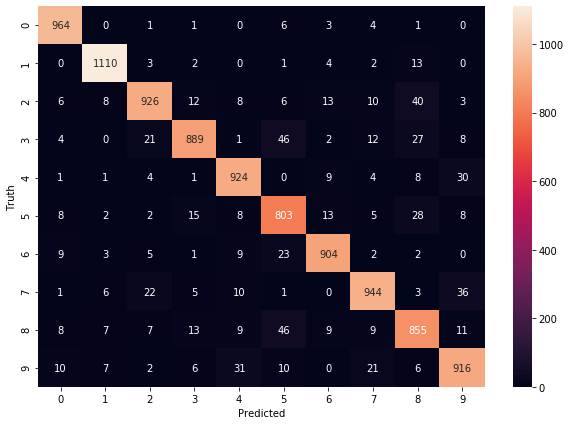

In [44]:
#better visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#this is how you can evaluate the model well and the errors.

In [49]:
#now we will add some hidden layers in the model. hidden layers tends to improve the performance.


model = keras.Sequential([
    #sequence here means it is a stack of layers in the neural network.
    #Dense here means that every neuron in one layer is connected with every other neuron of another layer.
    keras.layers.Dense(100,input_shape= (784,),activation = 'relu'), #this is the hidden layer, we will try it with 100 hidden layers first then increase if the performance os not well. and we gonna use relu activation function.
    keras.layers.Dense(10,activation = 'sigmoid') #this is the output layer
    
    #in dense (10 is output layer) and (784 is input layer.).
])

#that's it , this is simple neural network.
#in neural network we have to compile is everytime.
#what is optimizer? optimizers allows you to train efficiently. when the back propogation and training is going on.it allows you to reach to global optima.
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #out output data is categorical (0-9), sparse is our y_train is int., if it was one hot and coded array we would not have used sparse.
    metrics = ['accuracy']  #i want my metrics to be more accurate.
             )

model.fit(x_train_flatten, y_train, epochs = 5) #epochs means number of itreations out neural network will do the training.



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3004 - accuracy: 0.9157
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1425 - accuracy: 0.9579
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1010 - accuracy: 0.9703
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0790 - accuracy: 0.9769
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0632 - accuracy: 0.9814


In [50]:
model.evaluate(x_test_flatten,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09627547963541001, 0.9701]

Text(69.0, 0.5, 'Truth')

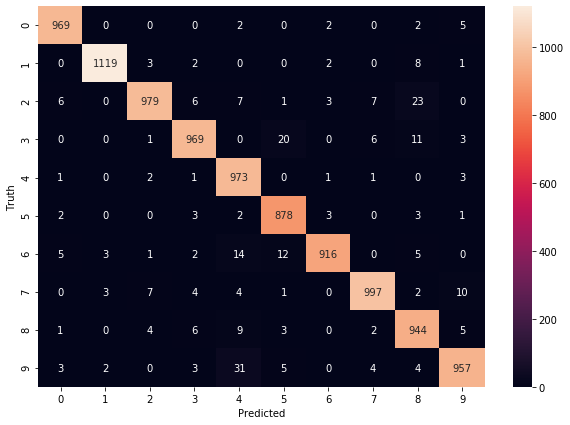

In [51]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [53]:
model = keras.Sequential([
    #sequence here means it is a stack of layers in the neural network.
    #Dense here means that every neuron in one layer is connected with every other neuron of another layer.
    keras.layers.Flatten(input_shape = (28,28)), #this way you dont have to use flatten, it will do.
    keras.layers.Dense(100,activation = 'relu'), #this is the hidden layer, we will try it with 100 hidden layers first then increase if the performance os not well. and we gonna use relu activation function.
    keras.layers.Dense(10,activation = 'sigmoid') #this is the output layer
    
    #in dense (10 is output layer) and (784 is input layer.).
])

#that's it , this is simple neural network.
#in neural network we have to compile is everytime.
#what is optimizer? optimizers allows you to train efficiently. when the back propogation and training is going on.it allows you to reach to global optima.
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #out output data is categorical (0-9), sparse is our y_train is int., if it was one hot and coded array we would not have used sparse.
    metrics = ['accuracy']  #i want my metrics to be more accurate.
             )

model.fit(x_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2936 - accuracy: 0.9164
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1380 - accuracy: 0.9602
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1021 - accuracy: 0.9694
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0795 - accuracy: 0.9759
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0651 - accuracy: 0.9804


In [55]:
#EXERCISE

#try different optimizers, loss, metrics and even more hidden layers or another activation function, change epochs. try to find more score then 97.



In [56]:
#Activation function



In [57]:
#step function , one of the activation function (the problem comes with step function when hyou do multi class classification.)
#sigmoid function,its help in multi class classification. 
#tanh function, tanh(z) = e^z - e^-z/e^z + e^-z, range (-1,1), 
#NOTE - Use sigmoid in output layer. All other places try to use tanh.
#tanh is always better coz it calculates the of zero and center your data.
#the issue with sigmoid and tanh is, vanishing gradient. to undermine this problem, they came up with gthe activation function called RELU.
#RELU(z) = max(0,x) , it is very simple, if your value is less than 0 then your value is 0 (output value), and if it is more than 0 then it is equal to the value itself.
#NOTE - For hidden layers if you are not sure about which activation function to use, just use Relu as your default choice.
#if the value is 0 the value is 0 but what if it is negative but have some gradient,
#there is a function named, Leaky RELU(z) = max(0.1x,x) , 
#step function, sigmoid function, Relu, leaky relu, tanh. Try it yourself to find which is better for the particular models , and it is difficult sometimes to just find that.




In [58]:
#sigmoid function

import math

def sigmoid(x):
    return 1/(1+ math.exp(-x))

In [59]:
sigmoid(100)

1.0

In [60]:
sigmoid(1)

0.7310585786300049

In [61]:
sigmoid(-56)

4.780892883885469e-25

In [62]:
sigmoid(0.5)

0.6224593312018546

In [63]:
#tanh

def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [64]:
tanh(100)

1.0

In [65]:
tanh(-56)

-1.0

In [66]:
tanh(1)

0.7615941559557649

In [67]:
#relu

def relu(x):
    return max(0,x)

In [68]:
relu(-1)

0

In [69]:
relu(100)

100

In [70]:
relu(6)

6

In [71]:
def leaky_relu(x):
    return max(.1*x, x)

In [72]:
leaky_relu(-1)

-0.1

In [73]:
leaky_relu(-100)

-10.0

In [74]:
leaky_relu(100)

100

In [75]:
#Derivatives

